In [261]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats.mstats import normaltest
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

train = pd.read_csv('train.csv')
train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
571,572,20,RL,60.0,7332,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,120000
537,538,20,RL,NaN,12735,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnWw,NaN,0,4,2008,COD,Normal,111250
183,184,50,RM,63.0,11426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,200000
683,684,20,RL,90.0,11248,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,285000
346,347,20,RL,NaN,12772,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,15500,4,2007,WD,Normal,151500


In [262]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Summary

- Write here

# Analysis

In [263]:
# checking for missing values
train.apply(lambda x: sum(x.isnull()),axis=0) 

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

## Sale Price

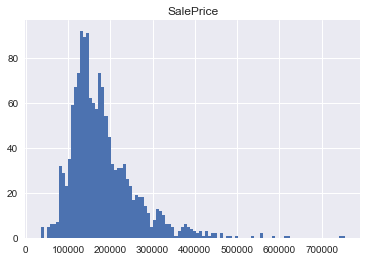

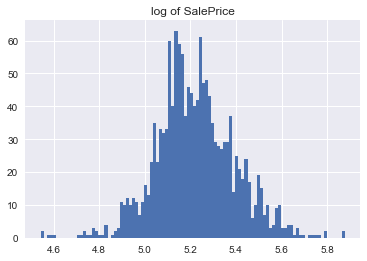

In [264]:
def plot_histogram(dataset, column, bins=100):
    dataset.hist(column=column, bins=bins)
    dataset['log of '+column] = np.log10(dataset[column])
    dataset.hist(column='log of '+column, bins=bins)

plot_histogram(train, 'SalePrice')

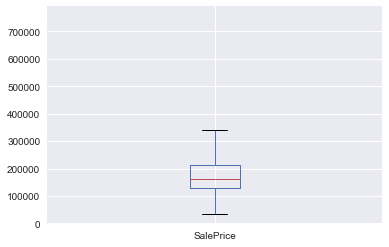

In [265]:
train.boxplot(column='SalePrice')

R^2 = 1.000000


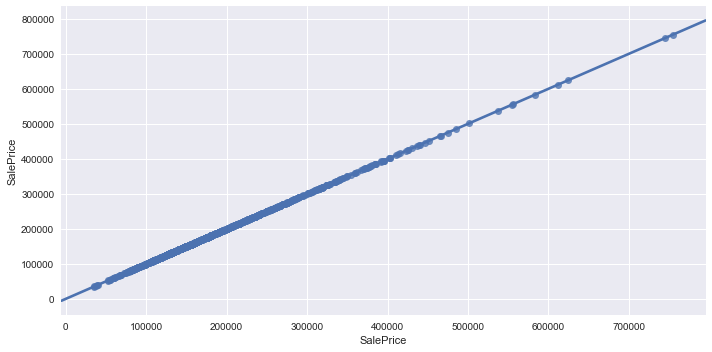

In [266]:
def r_squared(dataset, x_column, y_column):
    # if nan, get rows out
    x = np.array(dataset[x_column])
    y = np.array(dataset[y_column])

    x = x.reshape(dataset.shape[0], 1)
    y = y.reshape(dataset.shape[0], 1)

    model = LinearRegression()
    model.fit(x, y)
    print('R^2 = %f' % model.score(x, y))
    
def scatter_plot(dataset, x_column, y_column):
    dataset = dataset.dropna(subset=[x_column])
    sns.lmplot(x=x_column, y=y_column, data=dataset, fit_reg=True, aspect=2)
    r_squared(dataset, x_column, y_column)
    
scatter_plot(train, 'SalePrice', 'SalePrice')

### Analysis

Write analysis here.

## Building Class


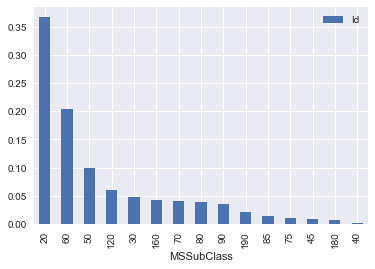

In [267]:
def plot_category_distribution(dataset, column_name):
    (dataset[['Id',column_name]].groupby(column_name).count()/dataset.shape[0]).sort_values(by='Id',ascending=0).plot(kind='bar')
    #(dataset[['Id',column_name]].groupby(column_name).count()/dataset.shape[0]).plot(kind='bar')

plot_category_distribution(train, 'MSSubClass')

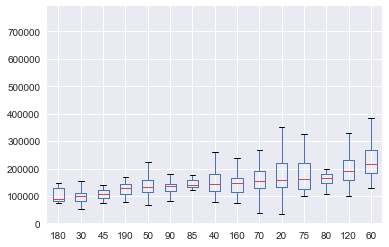

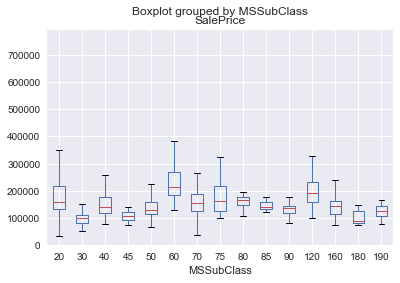

In [268]:
def boxplot_sorted(dataset, by, column):
    dataset = pd.DataFrame({col:vals[column] for col, vals in dataset.groupby(by)})
    medians = dataset.median().sort_values()
    return dataset[medians.index].boxplot()

def plot_category_correlation(dataset, column_name):
    boxplot_sorted(dataset, column_name, 'SalePrice')
    dataset.boxplot(column='SalePrice', by=column_name)
    
plot_category_correlation(train, 'MSSubClass')

### Analysis

This feature must be transformed one way or another. To avoid one-hot encoding, we may have to assume an order on the classes (based on median of SalePrice?). This could induce the correlation showed above.

It may also make sense to group "similar" classes, although of course deciding how to group them may be an issue.

That said, that seems to be a Paretto when looking at class distribution. Classes 20 and 60 amount to more than 55% of data. 

## General Zoning Classification

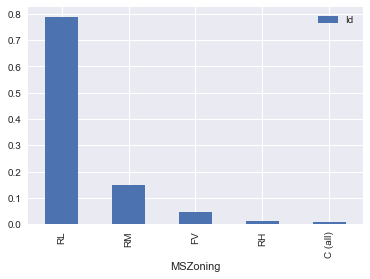

In [269]:
plot_category_distribution(train, 'MSZoning')

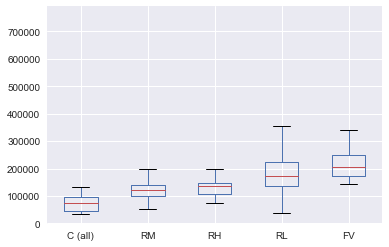

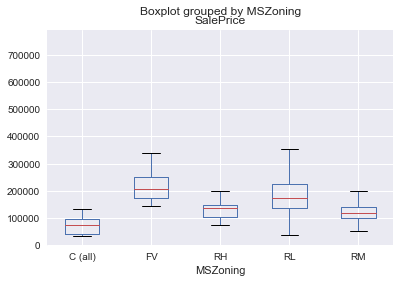

In [270]:
plot_category_correlation(train, 'MSZoning')

### Analysis

Write analysis here.

## Linear feet of street connected to property


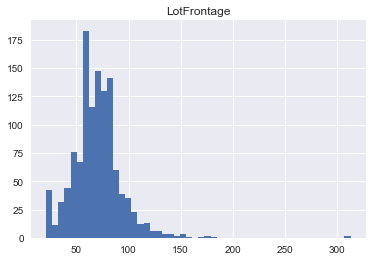

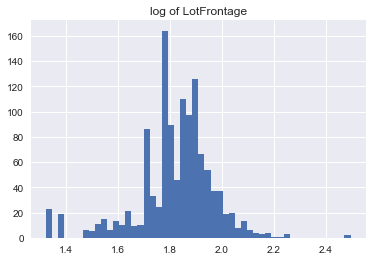

In [271]:
plot_histogram(train, 'LotFrontage', bins=50)

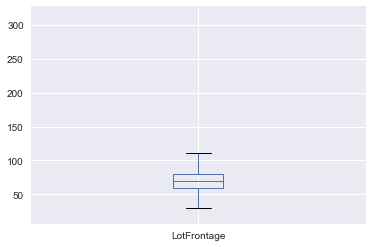

In [272]:
train.boxplot(column='LotFrontage')

R^2 = 0.123763


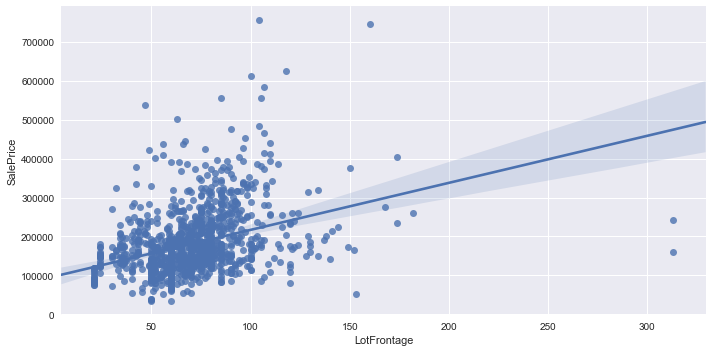

In [273]:
scatter_plot(train, 'LotFrontage', 'SalePrice')

### Analysis

Write analysis here.

## Lot size in square feet

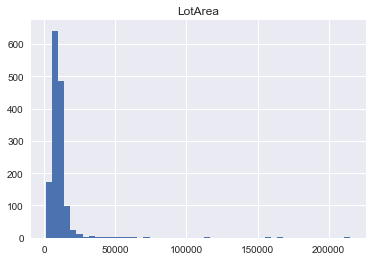

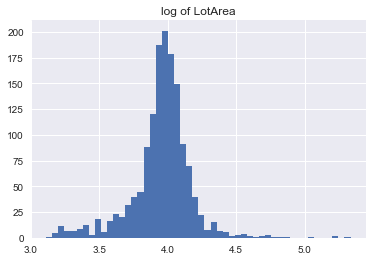

In [274]:
plot_histogram(train, 'LotArea', bins=50)

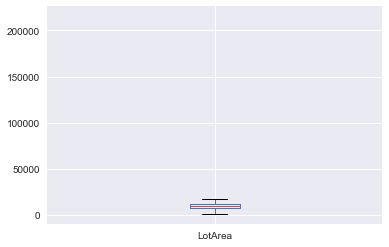

In [275]:
train.boxplot(column='LotArea')

R^2 = 0.069613


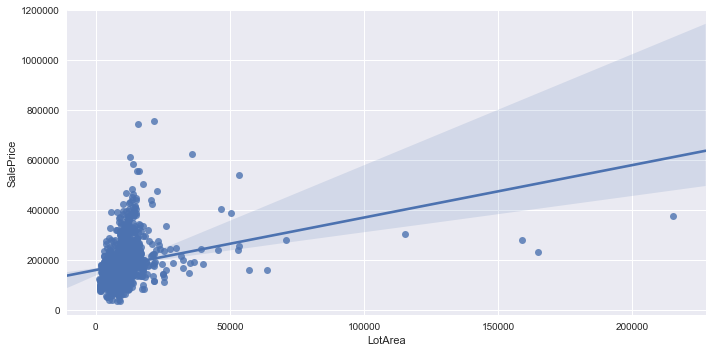

In [276]:
scatter_plot(train, 'LotArea', 'SalePrice')

### Analysis

This is surprising. I expected a stronger linear relationship here. Maybe this feature only matters when combined with others? For example, building class, neighborhood, etc.

## Type of road access

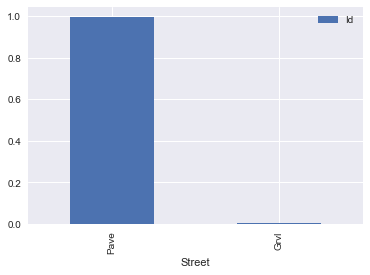

In [277]:
plot_category_distribution(train, 'Street')

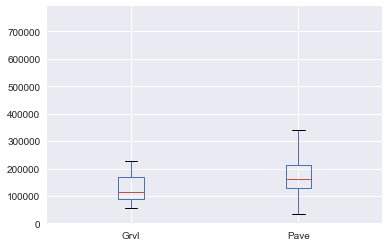

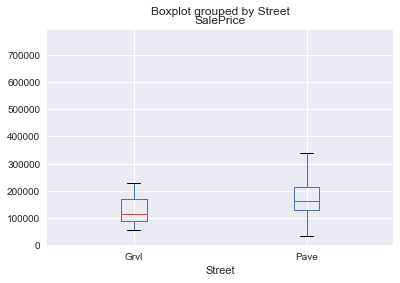

In [278]:
plot_category_correlation(train, 'Street')

### Analysis

Write analysis here.

## Type of alley access

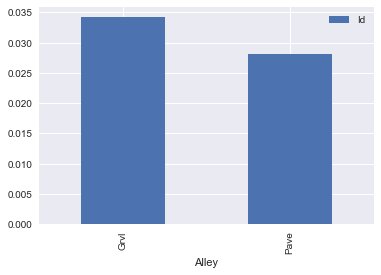

In [279]:
plot_category_distribution(train, 'Alley')

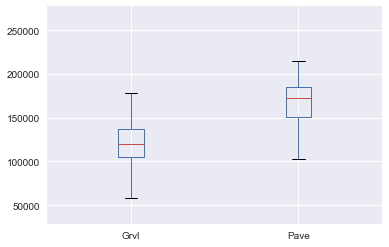

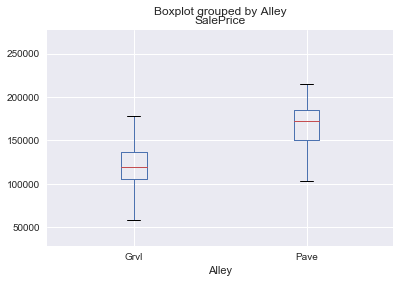

In [280]:
plot_category_correlation(train, 'Alley')

### Analysis

Write analysis here.

## General shape of property

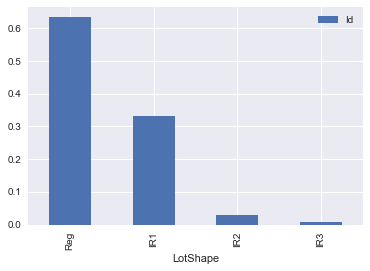

In [281]:
plot_category_distribution(train, 'LotShape')

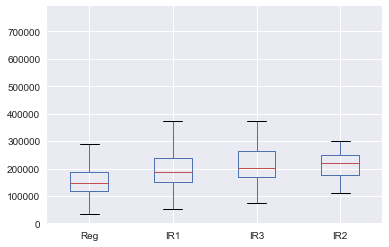

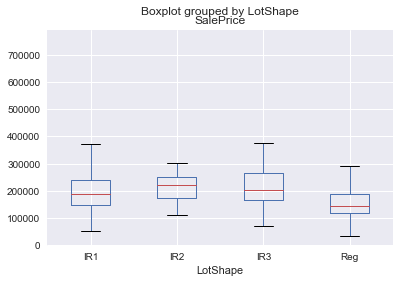

In [282]:
plot_category_correlation(train, 'LotShape')

### Analysis

Write analysis here.

## Flatness of the property

Write hypothesis here, if any.

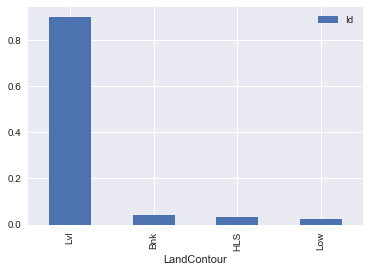

In [283]:
plot_category_distribution(train, 'LandContour')

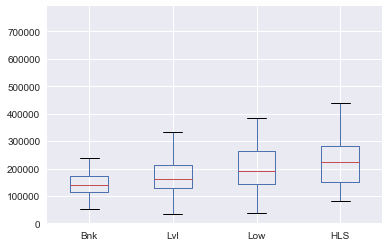

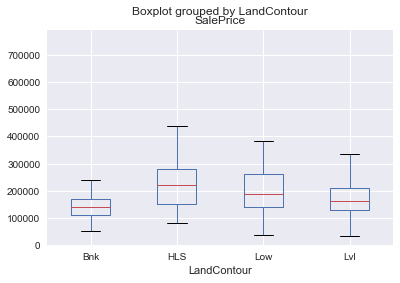

In [284]:
plot_category_correlation(train, 'LandContour')

### Analysis

Write analysis here.

## Type of utilities available

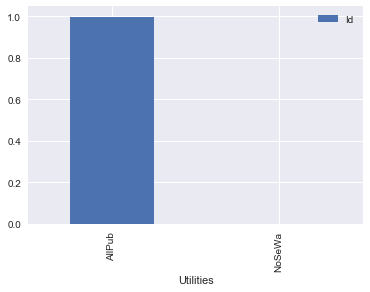

In [285]:
plot_category_distribution(train, 'Utilities')

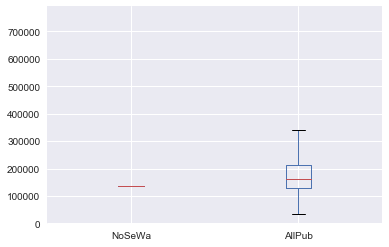

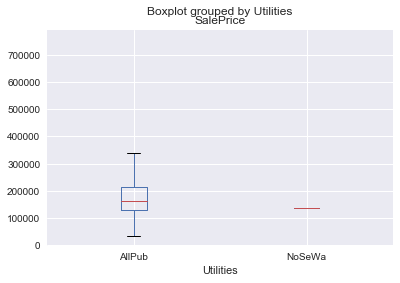

In [286]:
plot_category_correlation(train, 'Utilities')

## Lot configuration

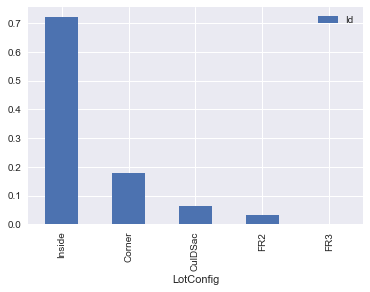

In [287]:
plot_category_distribution(train, 'LotConfig')

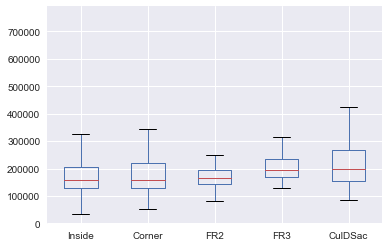

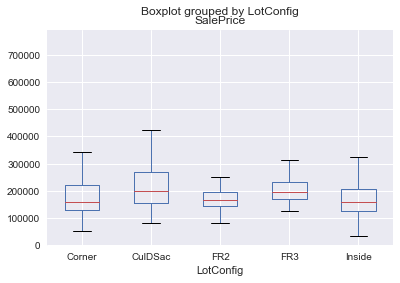

In [288]:
plot_category_correlation(train, 'LotConfig')

## Slope of property

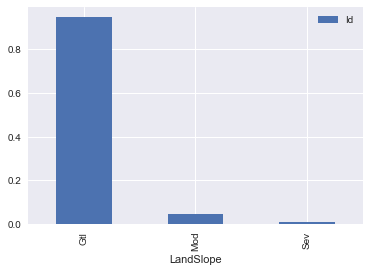

In [289]:
plot_category_distribution(train, 'LandSlope')

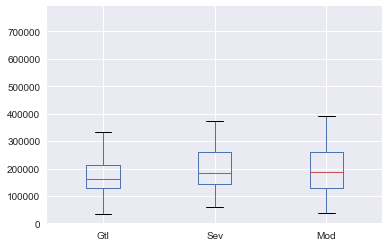

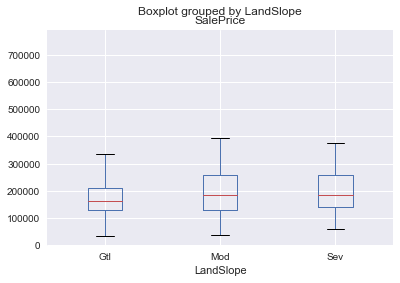

In [290]:
plot_category_correlation(train, 'LandSlope')

## Physical locations within Ames city limits

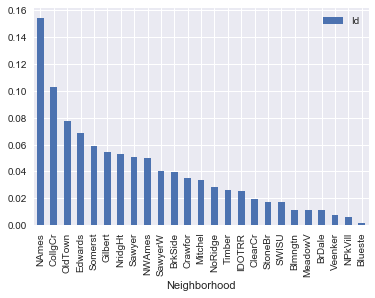

In [291]:
plot_category_distribution(train, 'Neighborhood')

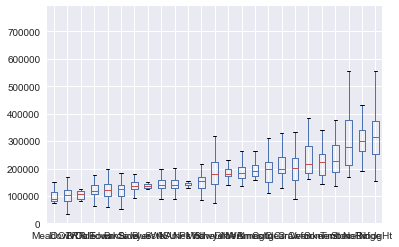

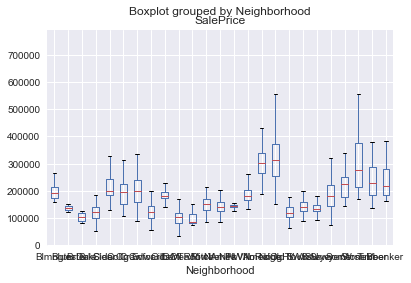

In [292]:
plot_category_correlation(train, 'Neighborhood')

## Proximity to main road or railroad

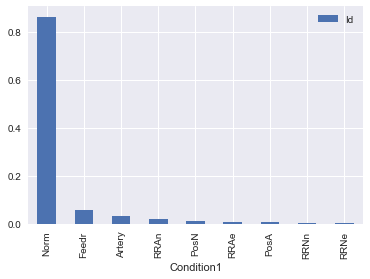

In [293]:
plot_category_distribution(train, 'Condition1')

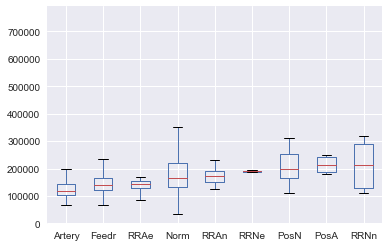

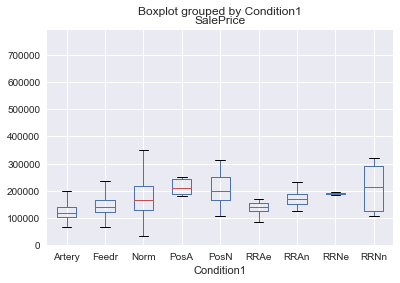

In [294]:
plot_category_correlation(train, 'Condition1')

## Proximity to main road or railroad (if a second is present)

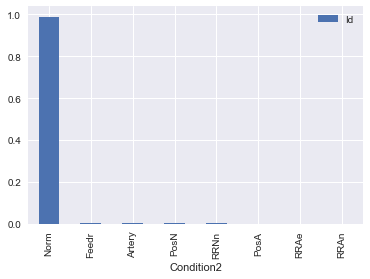

In [295]:
plot_category_distribution(train, 'Condition2')

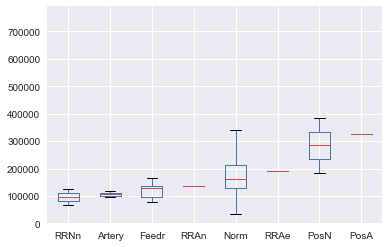

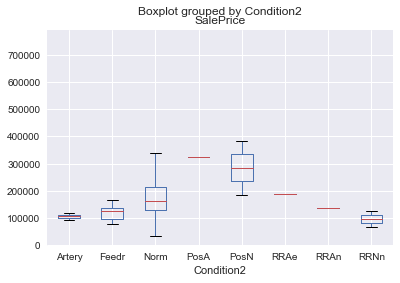

In [296]:
plot_category_correlation(train, 'Condition2')

## Type of dwelling

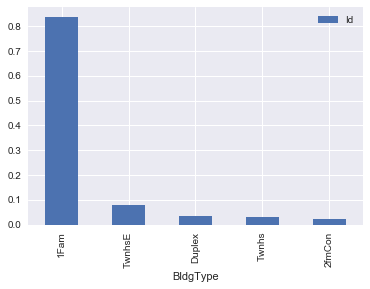

In [297]:
plot_category_distribution(train, 'BldgType')


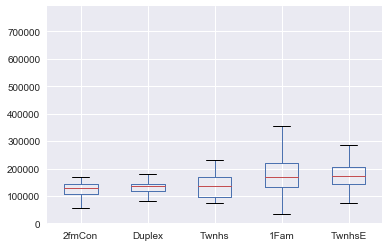

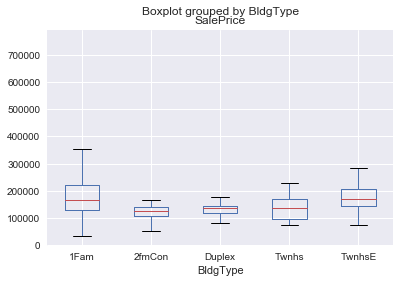

In [298]:
plot_category_correlation(train, 'BldgType')

## Style of dwelling

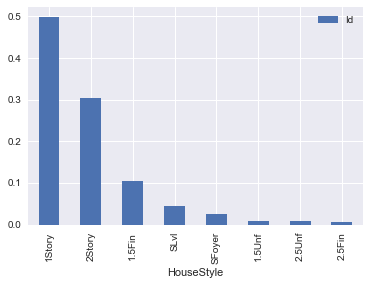

In [299]:
plot_category_distribution(train, 'HouseStyle')

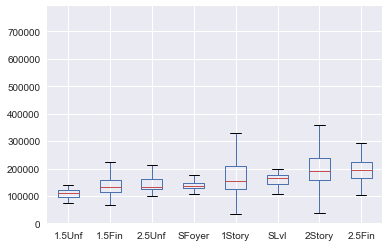

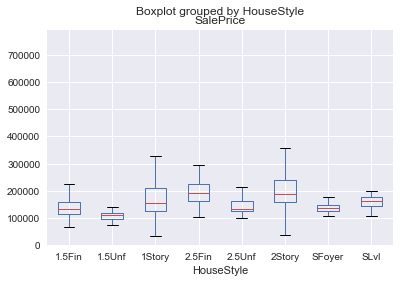

In [300]:
plot_category_correlation(train, 'HouseStyle')

## Overall material and finish quality

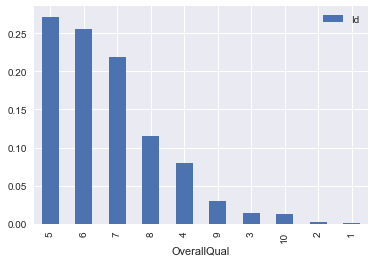

In [301]:
plot_category_distribution(train, 'OverallQual')

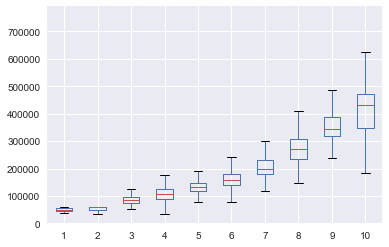

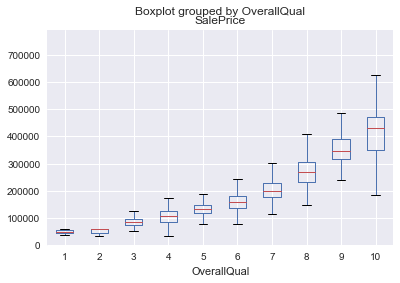

In [302]:
plot_category_correlation(train, 'OverallQual')

## Overall condition rating

Is it correlated with OveralQual?

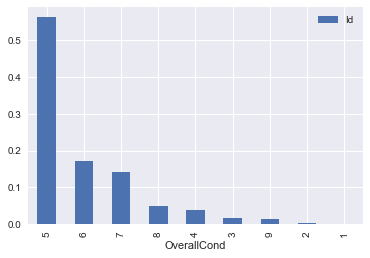

In [303]:
plot_category_distribution(train, 'OverallCond')

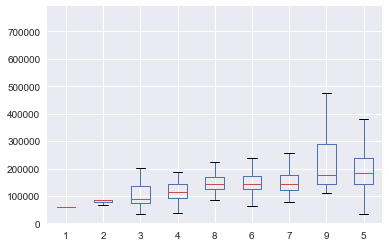

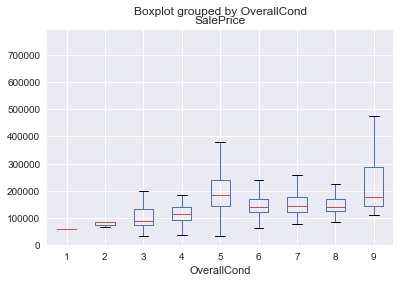

In [304]:
plot_category_correlation(train, 'OverallCond')

## Original construction date

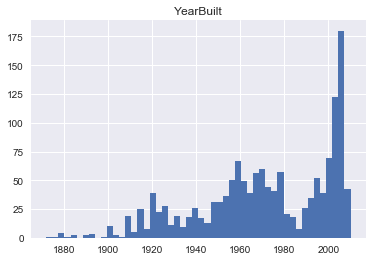

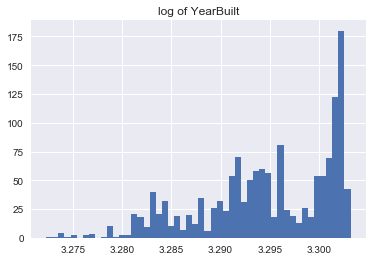

In [305]:
plot_histogram(train, 'YearBuilt', bins=50)

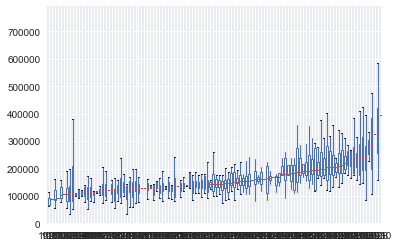

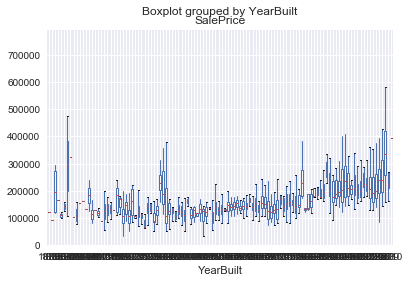

In [306]:
plot_category_correlation(train, 'YearBuilt')

R^2 = 0.273422


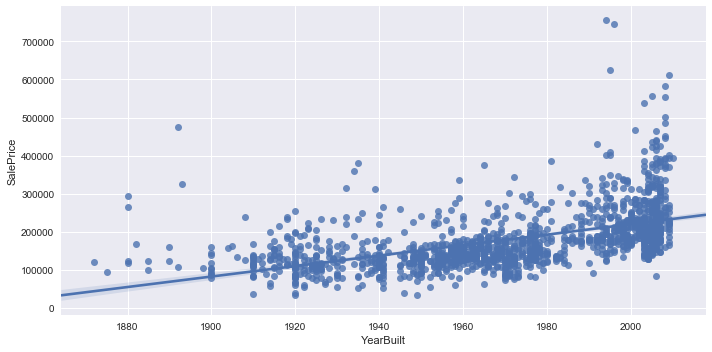

In [307]:
scatter_plot(train, 'YearBuilt', 'SalePrice')

## Remodel date

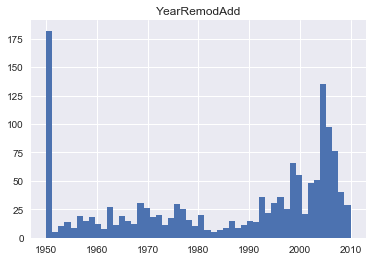

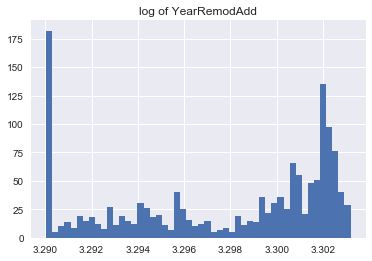

In [308]:
plot_histogram(train, 'YearRemodAdd', bins=50)

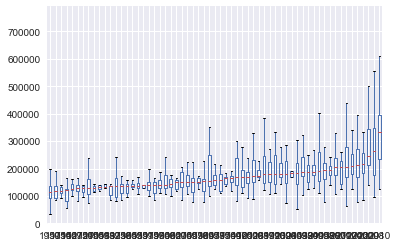

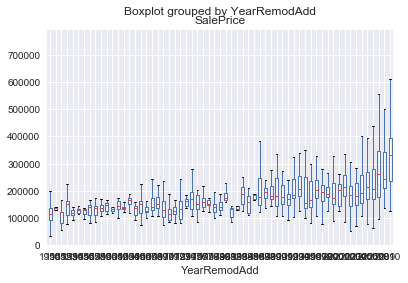

In [309]:
plot_category_correlation(train, 'YearRemodAdd')

R^2 = 0.257151


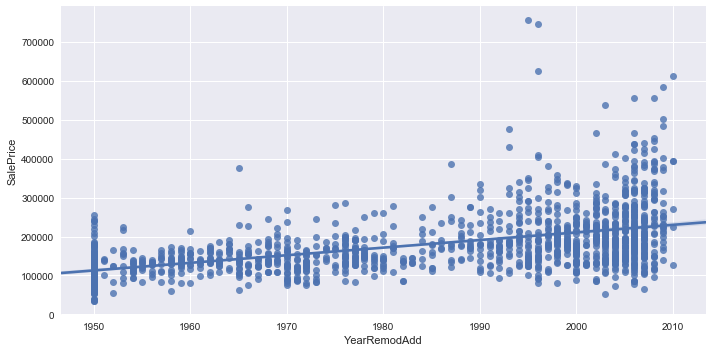

In [310]:
scatter_plot(train, 'YearRemodAdd', 'SalePrice')

## Type of roof

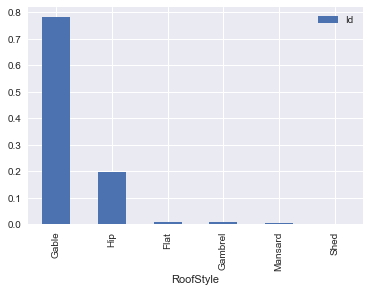

In [311]:
plot_category_distribution(train, 'RoofStyle')

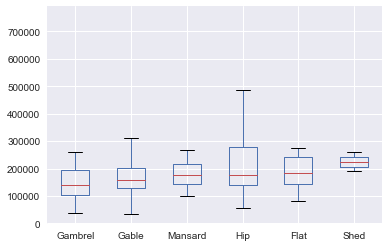

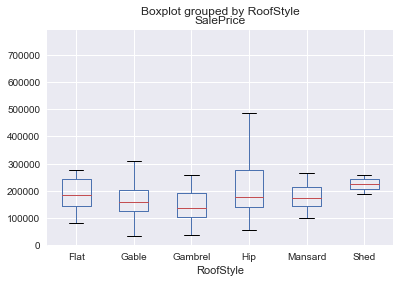

In [312]:
plot_category_correlation(train, 'RoofStyle')

## Roof material

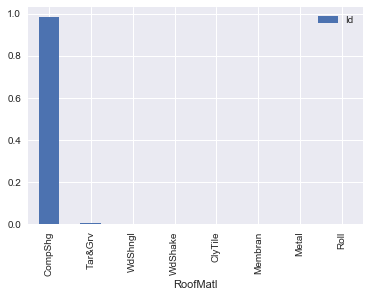

In [313]:
plot_category_distribution(train, 'RoofMatl')


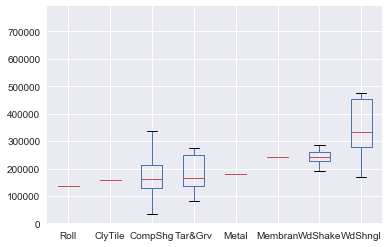

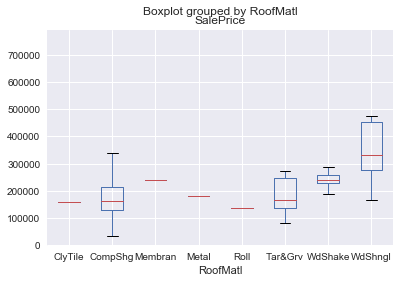

In [314]:
plot_category_correlation(train, 'RoofMatl')

## Exterior covering on house

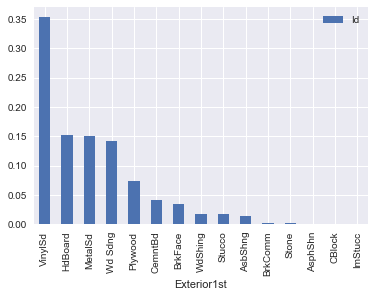

In [315]:
plot_category_distribution(train, 'Exterior1st')


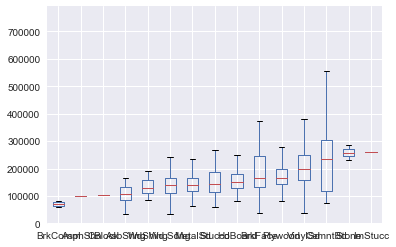

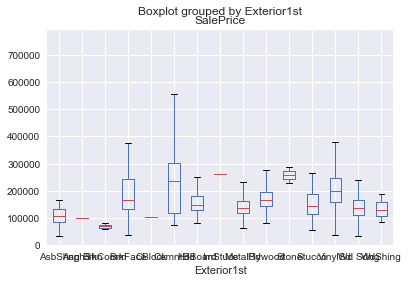

In [316]:
plot_category_correlation(train, 'Exterior1st')


## Exterior covering on house (if more than one material)


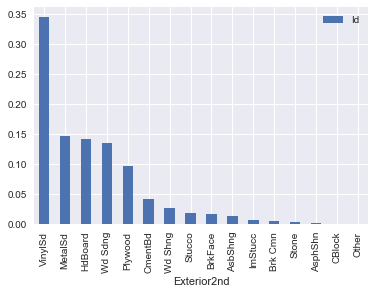

In [317]:
plot_category_distribution(train, 'Exterior2nd')


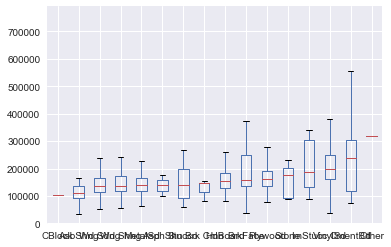

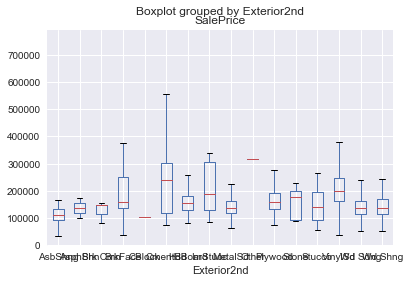

In [318]:
plot_category_correlation(train, 'Exterior2nd')


## Masonry veneer type

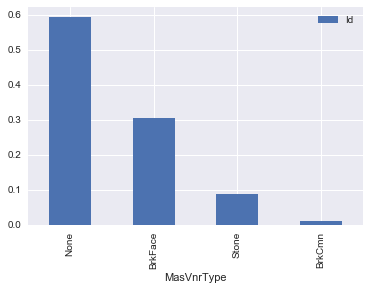

In [319]:
plot_category_distribution(train, 'MasVnrType')

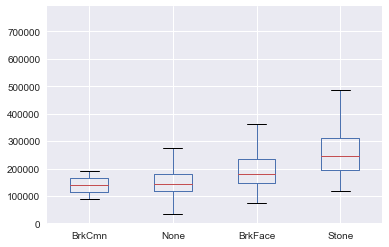

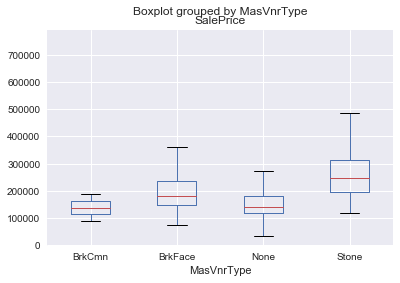

In [320]:
plot_category_correlation(train, 'MasVnrType')

## Masonry veneer area in square feet

Join this with previous feature somehow? Drop zeroes before analyzing?

In [321]:
#plot_histogram(train, 'MasVnrArea', bins=50)

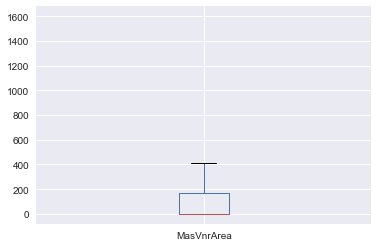

In [322]:
train.boxplot(column='MasVnrArea')

R^2 = 0.228000


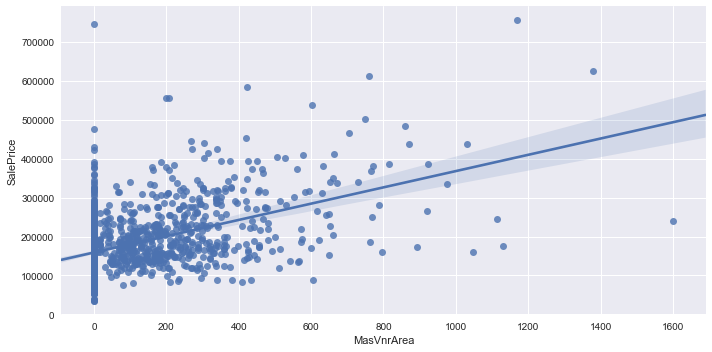

In [323]:
scatter_plot(train, 'MasVnrArea', 'SalePrice')

## Exterior material quality

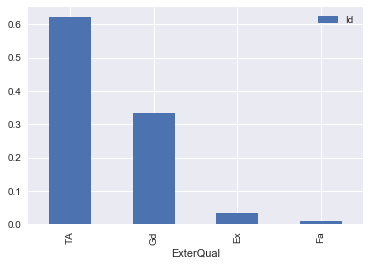

In [324]:
plot_category_distribution(train, 'ExterQual')

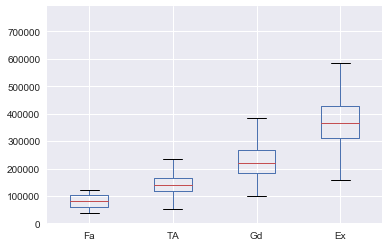

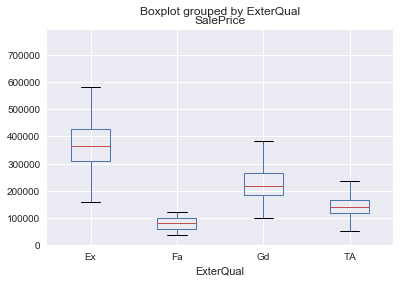

In [325]:
plot_category_correlation(train, 'ExterQual')


## Present condition of the material on the exterior

Join with previous feature somehow? Maybe conditions matters more for better materials.

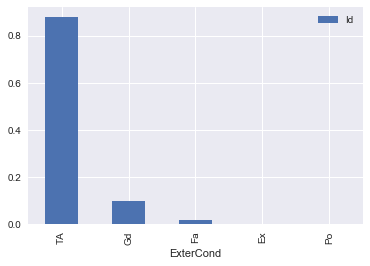

In [326]:
plot_category_distribution(train, 'ExterCond')

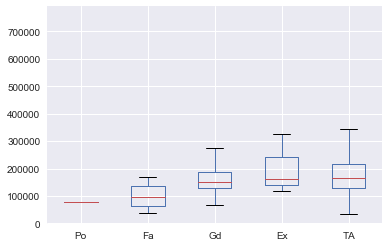

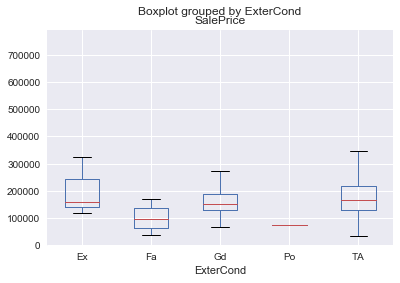

In [327]:
plot_category_correlation(train, 'ExterCond')

## Type of foundation

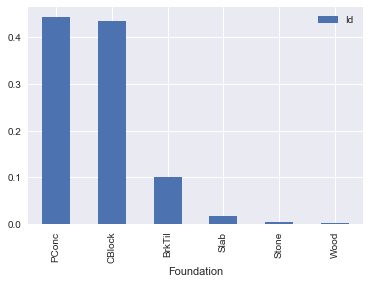

In [328]:
plot_category_distribution(train, 'Foundation')


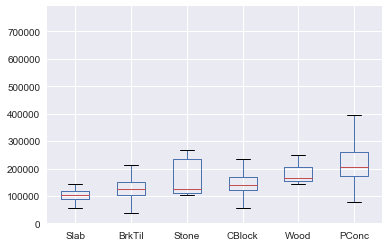

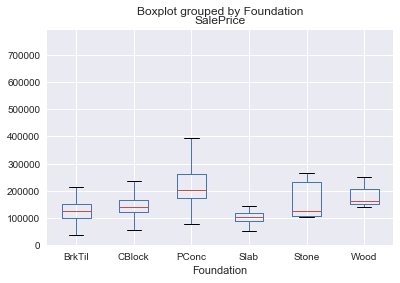

In [329]:
plot_category_correlation(train, 'Foundation')


## Height of the basement

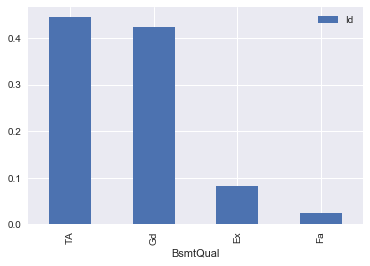

In [330]:
plot_category_distribution(train, 'BsmtQual')

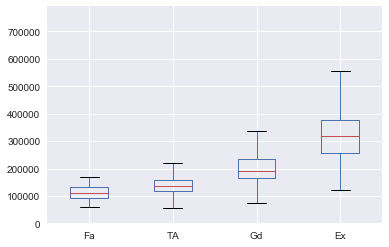

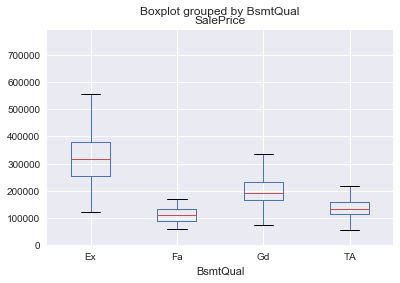

In [331]:
plot_category_correlation(train, 'BsmtQual')

## General condition of the basement

Combine with previous feature?

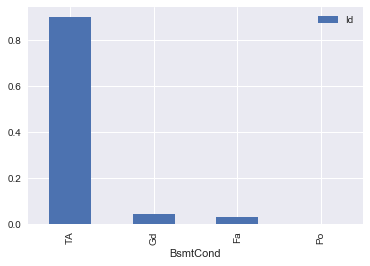

In [332]:
plot_category_distribution(train, 'BsmtCond')

R^2 = 0.069613


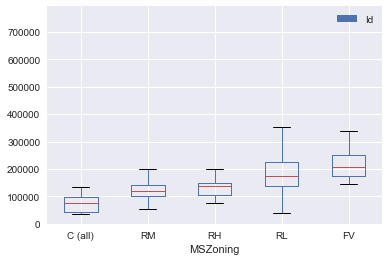

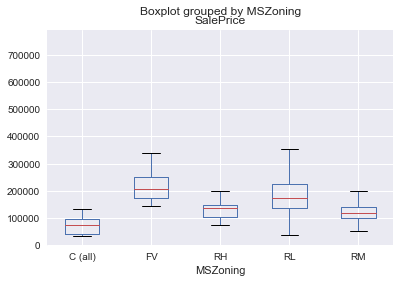

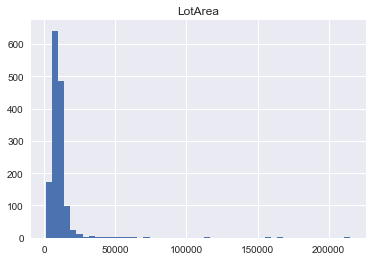

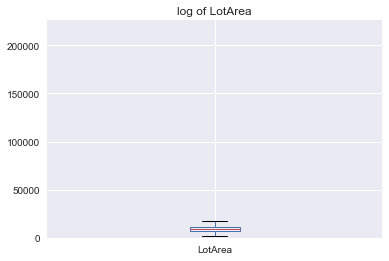

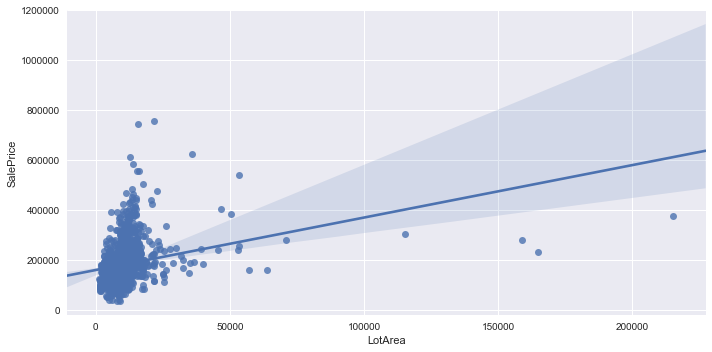

In [333]:
plot_category_distribution(train, 'MSZoning')
plot_category_correlation(train, 'MSZoning')

plot_histogram(train, 'LotArea', bins=50)
train.boxplot(column='LotArea')
scatter_plot(train, 'LotArea', 'SalePrice')

# TODO
- remove useless imports
- add q-q plot to histograms
- x-axis of boxplots
- correlation between features, not just the column we are trying to predict (correlation matrix)
- add new features and "describe" them as well, for example, month and date into time, and order by time to see if there is a correlation
- compare test set with train set, feature by feature. same distributions?
- clean data for training